# Second steps into Python

<div class="alert alert-block alert-warning">
<b>Optional exercises:</b> 

The second, **optional**, part of Assignment 1 contains additional excersises to train your Python skills, including the handling of DataFrames. 
</div>

We start by importing the libraries, loading the data and defining the `circ_dist` function. Nothing new here.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def circdist_rad(angles1,angles2):
    output = np.angle( np.exp(1j*(angles1-angles2))) # mathematical operation to get the circular distance
    return output # return the circular distance in radians 

# load the data from github
df = pd.read_csv("https://raw.githubusercontent.com/wimmerlab/MBC-DataAnalysis/main/A0_PythonBasics/Experiment2_all_subjects.csv",sep=' ')

# add the error in radians
df['error'] = circdist_rad(df.response, df. target)
df.head()

# list of subjects
subjects = np.unique(df.subject)


## Exercise 1

We want to check out that the experiment was well balanced in terms of laterality. The question is: **how many trials had the target in the left and in the right hemifields for each subject?**

Write the code to respond to that question. First think about a single subject, and then repeat the code in a for loop across all subjects.

1) Select the data for one subject. Remember you do that by defining a boolean for the subject, then subsetting the general dataframe `df` into a new dataframe `ds`.

2) Spend some time to think what condition you have to impose to determine that a trial had the target in the left hemifield, and what conditions would indicate that it is in the right or the left hemifield. Remember that our angles go from $-\pi$ to $\pi$ and the angle 0 corresponds to the angle marking 3 o'clock. Do some drawing! Express these conditions as booleans `bool_left` and `bool_right`. Hint: you can use the function `abs`.

3) Now think about a way to count how many trials you have of each kind. Remember that a boolean is a list of `True` and `False`'s, but when you involve it in algebraic formulas Python treats it as a list of `1` and `0`'s. You essentially want to know how many 1's are in the lists `bool_left` and `bool_right`. How do you get those two counts for this subject?

In [2]:
bool_s = df.subject==0
ds = df[bool_s].reset_index(drop=True)

bool_left = abs(ds.target) > np.pi/2
bool_right = abs(ds.target) < np.pi/2

np.sum(bool_left), np.sum(bool_right)

(35, 44)

Now do this for all subjects in a for loop:

In [3]:
for sub in subjects:
    bool_s = df.subject==sub
    ds = df[bool_s].reset_index(drop=True)
    
    bool_left = abs(ds.target) > np.pi/2
    bool_right = abs(ds.target) < np.pi/2
    
    print((np.sum(bool_left), np.sum(bool_right)))

(35, 44)
(18, 27)
(41, 52)
(34, 34)
(39, 32)
(39, 43)
(96, 96)
(51, 56)
(58, 62)


We can do exactly the same but much more compact in Pandas:

In [4]:
df['left'] = abs(df.target) > np.pi/2
df['right'] = abs(df.target) < np.pi/2
df.groupby('subject')[['left','right']].agg('sum')

,left,right
subject,,
0.0,35,44
1.0,18,27
2.0,41,52
3.0,34,34
4.0,39,32
5.0,39,43
6.0,96,96
7.0,51,56
8.0,58,62


## Exercise 2

Now order the subjects by the precision in their responses. There can be several ways to measure precision. First, let's define precision as the mean of squared response errors. What is the ranking of more to less precise subjects in our database? 

You can do this by adding the column `error2` with the squared errors (note that Python uses `**` for exponentiation to integers), then running a for-loop through subjects and subsetting `df`, computing mean squared error for each subject and store it in a pandas dataframe (see how you do this, using the `loc` function in the dataframe). Finally, sort this dataframe using the pandas function `sort_values()`. 


In [5]:
df['error2'] = df['error']**2
mse = pd.DataFrame()
for sub in subjects:
    bool_s = df.subject == sub
    ds = df[bool_s].reset_index(drop=True)
    mse_s = np.mean(ds['error2'])
    mse.loc[sub,'mse']=mse_s
    
mse.sort_values(by='mse')


,mse
8.0,0.011201
1.0,0.011916
6.0,0.013771
7.0,0.017944
3.0,0.019521
5.0,0.029432
2.0,0.031195
4.0,0.043539
0.0,0.046969


Alternatively, you could use the compact pandas syntax to take the mean of the column `error2` on a subject-by-subject basis, following the scheme in the previous exercise (and then use the pandas function `sort_values()` for sorting).

In [6]:
df.groupby('subject')['error2'].agg('mean').sort_values()

subject
8.0    0.011201
1.0    0.011916
6.0    0.013771
7.0    0.017944
3.0    0.019521
5.0    0.029432
2.0    0.031195
4.0    0.043539
0.0    0.046969
Name: error2, dtype: float64

An alternative method to compute precision would be by getting the variance of the errors. You could compute the variance of the errors for each subject and then order them based on that variance. Try it here using the pandas compact form:

In [7]:
df.groupby('subject')['error'].agg('var').sort_values()

subject
8.0    0.010929
1.0    0.011860
6.0    0.013441
7.0    0.016828
3.0    0.019768
5.0    0.026673
2.0    0.029201
4.0    0.043495
0.0    0.047532
Name: error, dtype: float64

is the order obtained by the two methods the same? are the numbers for the precision the same from the two methods? why not?

## Exercise 3

Let's check if our participants were equally precise when the target was in the top or the bottom hemifield

We can check that by plotting the precision in the top hemifield on the x-axis and the precision in the bottom hemifield on the y-axis, for each participant. We can calculate precision (rather, its reciprocal) as the variance of the errors. Think what is the condition that you have to impose on the target angle in order to select trials with target stimulus in the "top hemifield" and "bottom hemifield". Then compute the variance separately for these different groups of trials, and for each participant. If you save these precisions for all participants in a pandas dataframe, then you can use the function `DataFrame.plot.scatter` to make the plot.

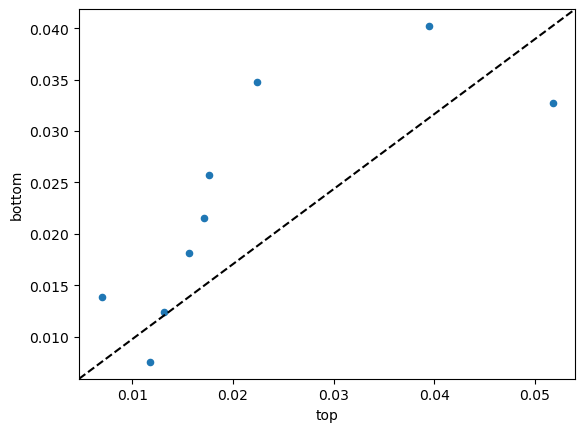

In [8]:
prec=pd.DataFrame()
for sub in subjects:
    bool_s = df.subject==sub
    ds = df[bool_s].reset_index(drop=True)
    prec.loc[sub,'top'] = np.var(ds[ds.target>0].error)
    prec.loc[sub,'bottom'] = np.var(ds[ds.target<0].error)
    
ax = prec.plot.scatter(x='top', y='bottom')
ax.plot([0, 1], [0, 1], 'k--', transform=ax.transAxes)

What do you conclude? Judging from the trend, what hemifield has better memory precision?

## Exercise 4

Now plot, for all subjects together, the errors when the target was in each of the 4 quadrants. Use the `plt.subplot` function to plot the 4 histograms in subpanels of a figure.

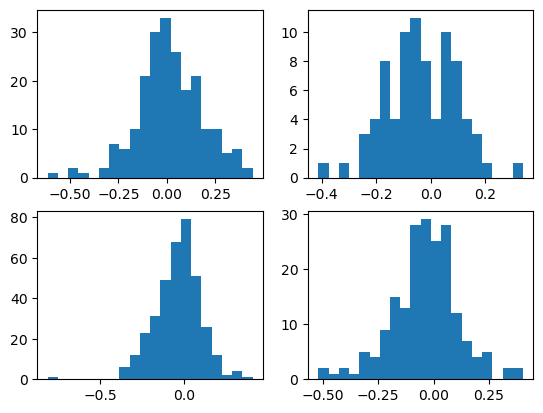

In [9]:
angles = np.arange(5)*np.pi/2-np.pi
for i in range(4):
    bool_a = (df.target>angles[i])&(df.target<angles[i+1])
    plt.subplot(2,2,i+1)
    plt.hist(df[bool_a].error,20)

## Exercise 5

What is the minimum and the maximum angular distances between simultaneously presented stimuli?

In [10]:
df['d1']=np.abs(circdist_rad(df.distr1,df.target))
df['d2']=np.abs(circdist_rad(df.distr2,df.target))
df['d3']=np.abs(circdist_rad(df.distr1,df.distr2))

print('min='+str(np.min([df.d1, df.d2, df.d3])))
print('max='+str(np.max([df.d1, df.d2, df.d3])))

min=0.24434960523068083
max=3.141592653589793
